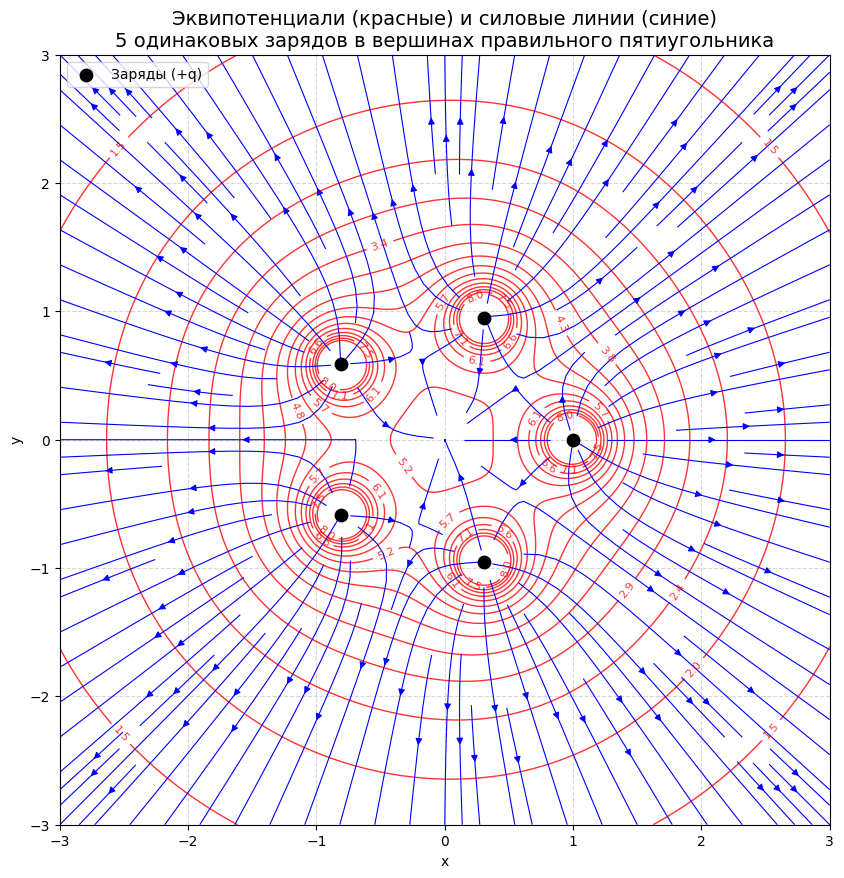

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы
q = 1.0                     # величина каждого заряда
R = 1.0                     # радиус описанной окружности пятиугольника
n_charges = 5               # количество зарядов

# Углы для вершин правильного пятиугольника
angles = np.linspace(0, 2 * np.pi, n_charges, endpoint=False)
x_charges = R * np.cos(angles)
y_charges = R * np.sin(angles)
charges = q * np.ones(n_charges)  # все заряды одинаковые

# Сетка для расчёта поля
x_min, x_max = -3, 3
y_min, y_max = -3, 3
N = 400  # разрешение сетки

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x, y)

# Инициализация потенциала и компонент поля
V = np.zeros_like(X)
Ex = np.zeros_like(X)
Ey = np.zeros_like(Y)

# Расчёт потенциала и напряжённости в каждой точке сетки
for i in range(n_charges):
    dx = X - x_charges[i]
    dy = Y - y_charges[i]
    r = np.sqrt(dx**2 + dy**2)

    r = np.where(r == 0, 1e-12, r)

    # Потенциал: V = Σ q_i / r_i
    V += charges[i] / r

    # Напряжённость: E = Σ q_i * r_vec / r^3
    Ex += charges[i] * dx / r**3
    Ey += charges[i] * dy / r**3

# Визуализация
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Эквипотенциальные линии
levels = np.linspace(1.5, 8.0, 15)
contour = plt.contour(X, Y, V, levels=levels, colors='red', linewidths=1.0, alpha=0.8)
plt.clabel(contour, inline=True, fontsize=8, fmt="%.1f")

# Силовые линии
strm = plt.streamplot(X, Y, Ex, Ey, color='blue', linewidth=0.8, density=1.5, arrowsize=1.0)

# Заряды
plt.scatter(x_charges, y_charges, c='black', s=80, zorder=5, label='Заряды (+q)')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal')
plt.title('Эквипотенциали (красные) и силовые линии (синие)\n'
          '5 одинаковых зарядов в вершинах правильного пятиугольника', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()